### Introduction:

  The project aims to analyze supermarket sales across different branches and provide insight to understand the customer better.The dataset was taken from Kaggle(https://www.kaggle.com/aungpyaeap/supermarket-sales).

   The dataset consists of sales data of a supermarket company from 3 different branches over 3 months from Jan-March 2019.

Attributes information:

|       Variables       |     Description                                                                              |                                                                             
|-----------------------|----------------------------------------------------------------------------------------------| 
|     Invoice ID        | Computer generated sales slip invoice identification number                                  |       |     Branch            |Branch of supermarket company(3 branches are available identified by A, B and C)              |       
|     City              |  Location of supermarket branches(Yangon,Mandalay,Naypyitaw)                                 |
|     customer type     | Type of customers( Members for customers using member card and Normal for without member card)|       
|     Gender            |Gender type of customer(Male,Female)                                                          |
|     Product line      |General item categorization groups ( Electronic accessories, Fashion accessories, 
                         Food and beverages,Health and beauty, Home and lifestyle, Sports and travel)                  |
|     Unit price        |Price of each product in $                                                                    |
|     Quantity          |Number of products purchased by customer                                                      |
|     Tax 5%           |Tax fee for customer buying                                                                    |
|     Total             | Total price including tax                                                                    |
|     Date              |  Date of purchase                                                                            |
|    Time               |Purchase time                                                                                 |
|    Payment            |Payment used by customer for purchase(3 methods are available – Cash, Credit card and Ewallet)|
|   cogs                |Cost of goods sold                                                                            |
|gross margin percentage|Gross margin percentage                                                                      |
|gross income           |  Gross income                                                                              |
|Rating                 |             Customer stratification rating on their overall shopping experience             |





#### Basic exploration of dataset:

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# reading the dataset
supermarket_sales= pd.read_csv("supermarket_sales (1).csv")
supermarket_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
# exploaring the number of observations and variables
supermarket_sales.shape

(1000, 17)

We have 1000 observations and 17 variables matching with the given dataset

In [5]:
#examining the first 10 observations of dataset
supermarket_sales.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [6]:
#examining the last 10 observations of dataset
supermarket_sales.tail(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.3000,804.3000,1/24/2019,18:10,Ewallet,766.00,4.761905,38.3000,6.0
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,3/10/2019,20:46,Ewallet,116.06,4.761905,5.8030,8.8
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2/22/2019,18:35,Ewallet,174.90,4.761905,8.7450,6.6
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6



|       Variables       |     Datatypes         |     Categories            |
|-----------------------|-----------------------| --------------------------|
|     Invoice ID        | Categorical(nominal)  |     1000                  |
|     Branch            | Categorical(nominal)  |     3                     |
|     City              | Categorical(nominal)  |     3                     |
|     Customer type     | Categorical(nominal)  |     2                     |
|     Gender            | Categorical(nominal)  |     2                     |
|     Product line      | Categorical(nominal)  |     3                     |
|     Unit Price        | Numerical(continuous) |     NA                    |
|     Quantity          | Numerical(discrete )  |     1- 10                 |
|     Tax 5%            | Numerical(continuous) |     NA                    |
|     Total             | Numerical(continuous) |     NA                    |
|     Date              | Categorical(ordinal)  |     NA                    |
|     Time              | categorical(ordinal)  |     NA                    |
|     Payment           | Categorical(Nominal ) |     3                     |
|     cogs              | Numerical(continuous) |     NA                    |
|gross margin percentage| Numerical(continuous) |     NA                    |
|     gross income      | Numerical(continuous) |     NA                    |
|     Rating            | Numerical(continuous) |     NA                    |

In [7]:
# to count unique values in each variable
supermarket_sales.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [8]:
#checking the null values
supermarket_sales.isnull().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

There are no null values in the given dataset

In [9]:
#checking the data types of variables as per python
supermarket_sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

#### Exploratory Data Analysis:

Is your supermarket more popular with males or females? 

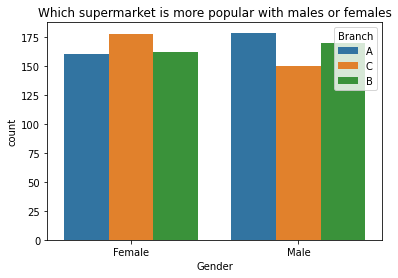

In [10]:
#checking the relationship between two categorical variables by using countplot
plt.title("Which supermarket is more popular with males or females")
plt.xlabel('Gender of customer')
plt.ylabel('Count')
sns.countplot(x="Gender",hue ="Branch",data=supermarket_sales)
plt.show()

|  City       | Branch      | popular with Males or Females|
| ----------- | ----------- |------------------------------|
| Yangon      |      A      | Males                        |
| Naypyitaw   |      C      | Females                      |
| Mandalay    |      B      | Males                        |

What does the customer rating look like and comment on its skewness? 


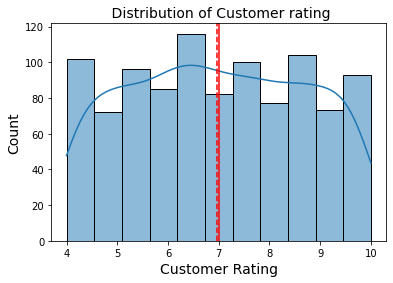

0.00900964876573073

In [11]:
#checking the distribution of numerical varaible using histogram with density plot
plt.title(" Distribution of Customer rating",fontsize='14')
sns.histplot(supermarket_sales["Rating"],kde=True)
plt.axvline(x=np.mean(supermarket_sales['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=supermarket_sales['Rating'].median(), c='red', ls='-', label='median')
plt.xlabel("Customer Rating",fontsize='14')
plt.ylabel("Count",fontsize='14')
plt.show()
#caluculating the skewness of the variable
supermarket_sales["Rating"].skew()

From the above interpretation ,the customer rating distribution looks normal and there is no skewness on the left or right side of the distribution.

What can you say about the aggregate sales across the branches?

In [14]:
#checking the total sales by each branch
sales_branch=supermarket_sales.groupby('Branch').sum()['Total']
sales_branch


Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

From the above calculation we can observe that the sales in branch c is higher than the branches A and B.

Which is the most popular payment method used by customers?

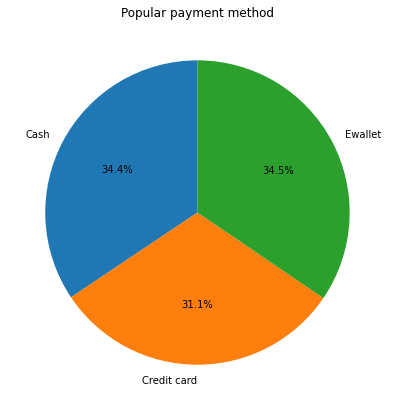

In [13]:
#using pie chart displaying the percentages of each category of categorical variable "payment"
method = supermarket_sales.groupby('Payment').count()['Customer type']
category = ['Cash','Credit card','Ewallet']
fig = plt.figure(figsize = (10,7))
plt.title("Popular payment method")
plt.pie(method,labels=category,autopct = '%1.1f%%',startangle=90)
plt.show()

From the above pie chart we can observe that the most popular payment method is both Ewallet and Cash but not Credit card payment method.

Does gross income affect customer ratings? 

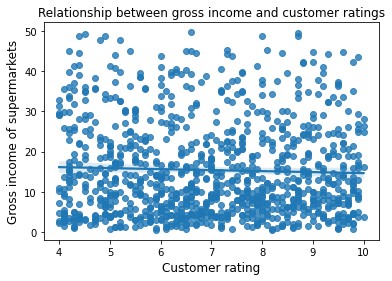

In [14]:
# to see the relationship between two numerical variables by using scatter plot or regression plot
plt.title("Relationship between gross income and customer ratings")
sns.regplot(supermarket_sales['Rating'], supermarket_sales['gross income'])
plt.xlabel("Customer rating",fontsize='12')
plt.ylabel("Gross income of supermarkets",fontsize='12')
plt.show()

From the above regression plot (scatter plot with linear regression line) the linear regression line is almost flat saying that  there is no relationship between gross income and ratings, so customer ratings are not effecting the gross .


Which is the most profitable branch?

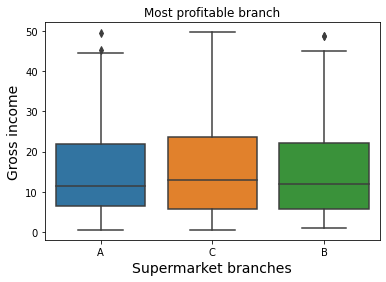

In [15]:
# to see the relationship between numerical and categorical variables using boxplot
plt.title("Most profitable branch")
sns.boxplot(x="Branch",y ="gross income",data=supermarket_sales)
plt.xlabel("Supermarket branches",fontsize='14')
plt.ylabel("Gross income",fontsize='14')
plt.show()

From the above interpretation we can observe that Branch C has a slightly higher gross income than branches A,B. As observed earlier,though branch A has slightly higher sales than branches B,C. So Naypyitaw is the most profitable branch in terms of gross income.

Finding  the relationship between Gender and Gross income:

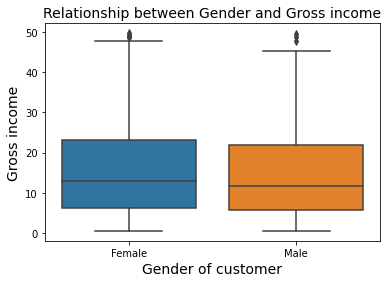

In [16]:
# to see the relationship between numerical and categorical variables using boxplot
plt.title("Relationship between Gender and Gross income",fontsize='14')
sns.boxplot(x="Gender",y ="gross income",data=supermarket_sales)
plt.xlabel("Gender of customer",fontsize='14')
plt.ylabel("Gross income",fontsize='14')
plt.show()


Gross income is almost similar for both Male and Female, eventhough Female customers spend a bit higher at the 75th percentile of IQR.

Can you see any time trend in gross income? 

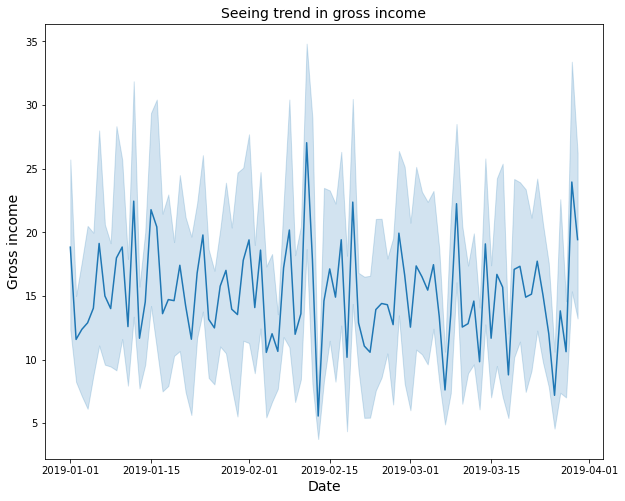

In [28]:
#by seeing trend using lineplot
plt.figure(figsize=(10,8))
plt.title("Seeing trend in gross income",fontsize='14')
sns.lineplot(x="Date",y="gross income",data=supermarket_sales)
plt.xlabel("Date",fontsize='14')
plt.ylabel("Gross income",fontsize='14')
plt.show()

from the above interpretation we can see there is no particular time trend is observed except for some days when the gross income is high or low. Overall it remains at an average level.

Which product line helps to generate the most income?

In [18]:
#here grouping the product lines with sum of gross income in decending order
product_line =supermarket_sales[["Product line", "gross income"]]
product_line_income= product_line.groupby(['Product line'],as_index=False).sum().sort_values('gross income', ascending=False)
product_line_income

,Product line,gross income
2,Food and beverages,2673.5640
5,Sports and travel,2624.8965
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530
3,Health and beauty,2342.5590


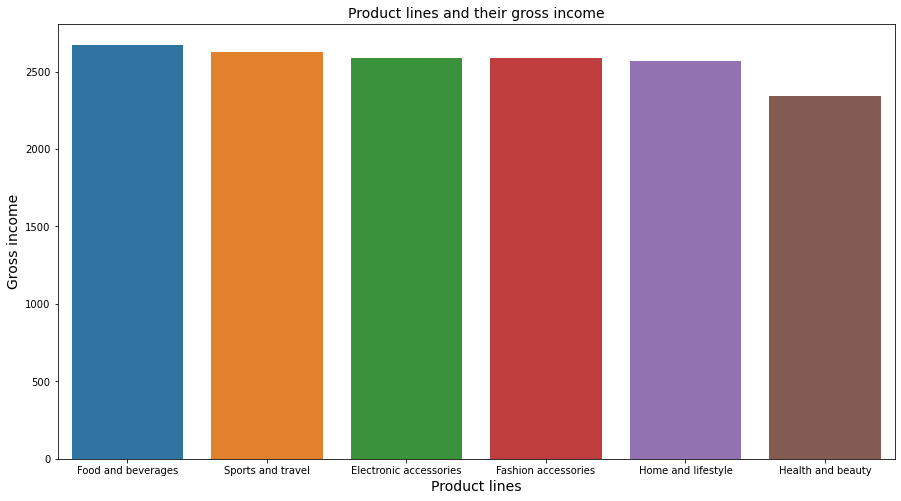

In [24]:
#from numpy import median
product_line =supermarket_sales[["Product line", "gross income"]]
product_line_income= product_line.groupby(['Product line'],as_index=False).sum().sort_values('gross income', ascending=False)
plt.figure(figsize=(15,8))
plt.title("Product lines and their gross income",fontsize='14')
# using bar plot to see the relationship between the categorical and numerical variables
#sns.barplot(x="Product line", y="gross income", data=product_line_income, estimator = median)
sns.barplot(x="Product line", y="gross income", data=product_line_income)
plt.xlabel("Product lines",fontsize='14')
plt.ylabel("Gross income",fontsize='14')
plt.show()

 Gross income is highest in Food and beverages

What is the spending pattern of both males and females, meaning in which category do they spend more? 

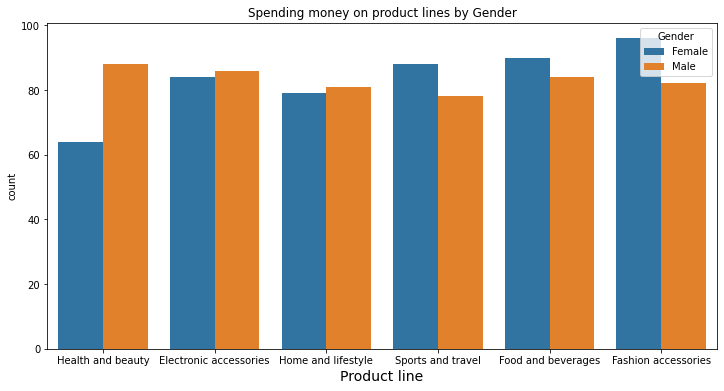

In [20]:
#using count plot we can see the relationship between gender and product lines
plt.figure(figsize=(12, 6))
plt.title('Spending money on product lines by Gender')
sns.countplot(x='Product line',hue='Gender',data = supermarket_sales)
plt.xlabel('Product line',fontsize='14')
plt.show()

Females spend more on 'Fashion accessories' and males spend more on 'Health and beauty'

How many products are bought by customers? 

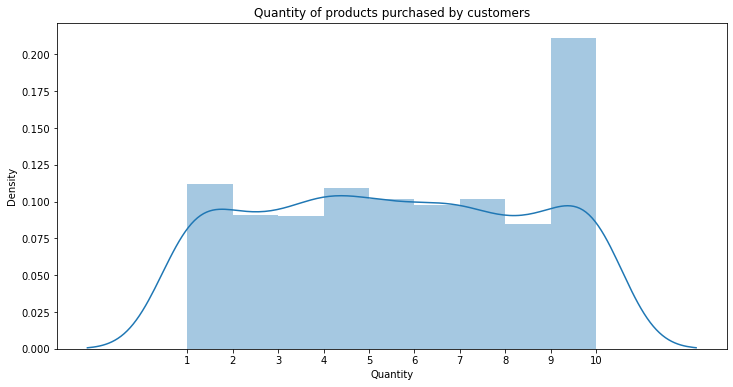

In [21]:
#quantity of products in the given dataset ranges from 1 - 10
product_quantity = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
plt.title("Quantity of products purchased by customers")
#using density plot we can see the distribution of variable quantity
sns.distplot(supermarket_sales['Quantity'])
plt.xlabel('Quantity')
plt.xticks(product_quantity)
plt.show()

 From the above graph we can see that majarity of the customers buy 10 quantities of products.
 

Which day of the week has maximum sales?

In [22]:
#extracting name of the day from date variable
supermarket_sales.Date = pd.to_datetime(supermarket_sales.Date)
supermarket_sales['weekday']=supermarket_sales.Date.dt.day_name()
#extracting number of hours per each day from time variable
supermarket_sales.Time = pd.to_datetime(supermarket_sales.Time)
supermarket_sales['Hour']=supermarket_sales.Time.dt.hour
supermarket_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-03-02 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-03-02 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-03-02 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-03-02 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-03-02 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2022-03-02 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,Tuesday,13
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2022-03-02 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,Saturday,17
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2022-03-02 13:22:00,Cash,31.84,4.761905,1.5920,7.7,Saturday,13
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2022-03-02 15:33:00,Cash,65.82,4.761905,3.2910,4.1,Friday,15


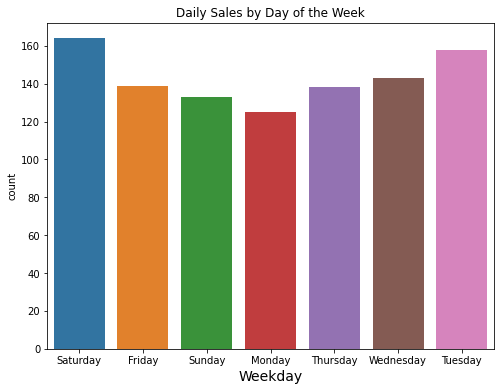

In [23]:
plt.figure(figsize=(8, 6))
plt.title('Daily Sales by Day of the Week')
#checking the distribution of categorical variable weekday
sns.countplot(supermarket_sales['weekday'])
plt.xlabel("Weekday",fontsize='14')
plt.show()

Sales are highest on Saturdays may be because it is the weekend.Monday is the lowest in sales, probably because it is start of the working week.

Which hour of the day is busiest?

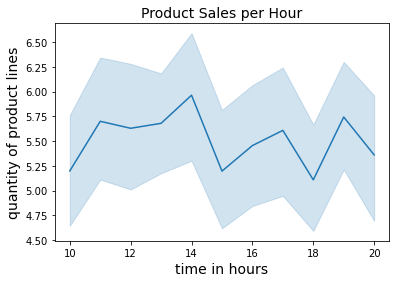

In [24]:
#checking the time trend of  product sales using the numerical variable 'Quantity'
plt.title("Product Sales per Hour",fontsize='14')
sns.lineplot(x="Hour", y = 'Quantity',data =supermarket_sales)
plt.xlabel('time in hours',fontsize='14')
plt.ylabel('quantity of product lines',fontsize='14')
plt.show()

From the above interpretation Peak hour is observed in the 14th hour i.e 2 pm of the day. Hence, sales is typically higher in the afternoons.

Which product line should supermarket focus on? 

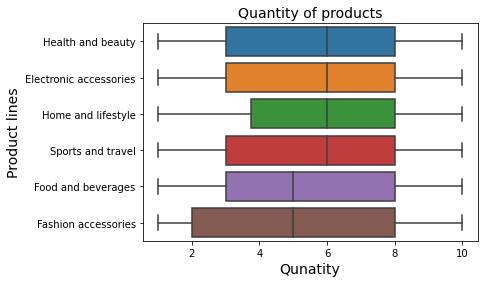

In [25]:
#observing the relationship between numerical and categorical variables using boxplot
plt.title("Quantity of products",fontsize='14')
sns.boxplot(x='Quantity',y='Product line',data = supermarket_sales)
plt.xlabel("Qunatity",fontsize='14')
plt.ylabel("Product lines",fontsize='14')
plt.show()

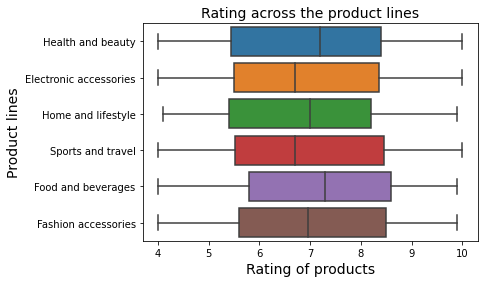

In [26]:
#observing the relationship between numerical and categorical variables using boxplot
plt.title("Rating across the product lines",fontsize='14')
sns.boxplot(x='Rating',y='Product line',data = supermarket_sales)
plt.xlabel('Rating of products',fontsize='14')
plt.ylabel('Product lines',fontsize='14')
plt.show()

Eventhough the rating for ‘fashion accessories’ and ‘food and beverages’ is high but quantity purchased is low. Hence, supply for these products need to be increased.

Which city should be chosen for expansion and what products should be focussed on?

In [1]:
# seeing the relationship between gross income and cities
plt.figure(figsize=(8,7))
plt.title("Gross income across cities",fontsize='16')
sns.barplot(supermarket_sales['City'].median(),supermarket_sales['gross income'].median())
plt.xlabel('City name',fontsize='16')
plt.ylabel('Gross income',fontsize='16')
plt.show()

NameError: name 'plt' is not defined

From the above graph we can see Naypyitaw is the most profitable city,so the expansion plan should be based on this city.

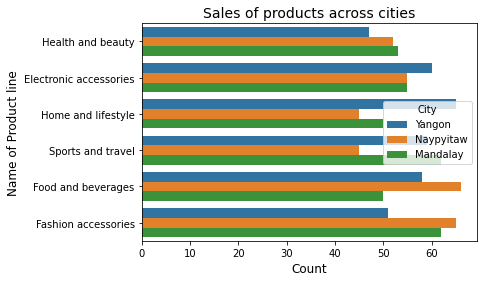

In [28]:
#seeing the relationship between categorical variables product line and city using countplot
plt.title("Sales of products across cities",fontsize='14')
sns.countplot(y ='Product line', hue = "City", data = supermarket_sales) 
plt.xlabel('Count',fontsize='12')
plt.ylabel('Name of Product line',fontsize='12')
plt.show()

Fashion accessories and Food and beverages are the most sold product in Naypyitaw and these products should be focused on for expansion along with Electronic accessories.

#### Conclusion:

   We used uni-variate, bi-variate ,multi-variate analysis to perform basic EDA on the supermarket sales data.

To summarize below are some of the findings/observations from the data:

1.There is no relationship between gross income and customer ratings.

2.The data consists of 3 cities/branches. Though branch A has slightly higher sales than the banches B,C, C i.e. Naypyitaw is the most profitable branch in terms of gross income.

3.Fashion accessories and Food and beverages are the most sold product in Naypyitaw and these products should be focused on along with electronic accessories.

4.The most popular payment method is E-wallet and cash payment.

5.There is no particular time trend that can be observed in gross income.

6.‘Food and beverages’ generates highest gross income.

7.Gross income is similar for both male and female, though female customers spend a bit higher at the 75th percentile. Females spend on ‘fashion accessories’ the most and for males it is ‘Health and beauty’. 

8.Most of the customers buy 10 quantities.

9.Busiest time of the day is afternoon i.e. around 2 pm which records highest sales.

10.Sales is higher on Saturdays compared to the rest of the week.

11.Naypyitaw is most profitable city ,though the rating for ‘fashion accessories’ and ‘food and beverages’ is high but the quantity purchased is low. Hence, supply for these products need to be increased.